In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

* The goal of dimensionality reduction
    + preserve semantics of high-dimensional data in low-dimensional subspace
    + overcome the curse of dimensionality: "When the dimensionality increases, the volume of the space increases so fast that the available data become sparse"

* Any ideas?
    + semantics is maintained by the spread: find directions that maximize the variance of data (PCA)
        + the variance

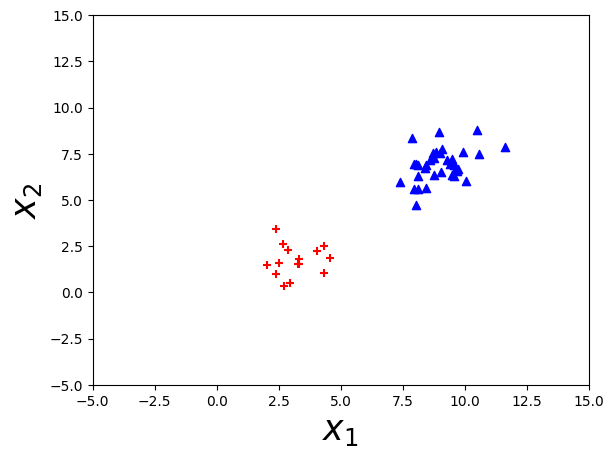

In [74]:

# generate random normally distributed point clouds (customize as needed)
x1 = np.random.normal(loc=3.0, size=15)
y1 = np.random.normal(loc=2.0, size=15)
x2 = np.random.normal(loc=9.0, size=35)
y2 = np.random.normal(loc=7.0, size=35)

# now do the plotting with matplotlib
plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.savefig('example.png', bbox_inches='tight')
plt.show()

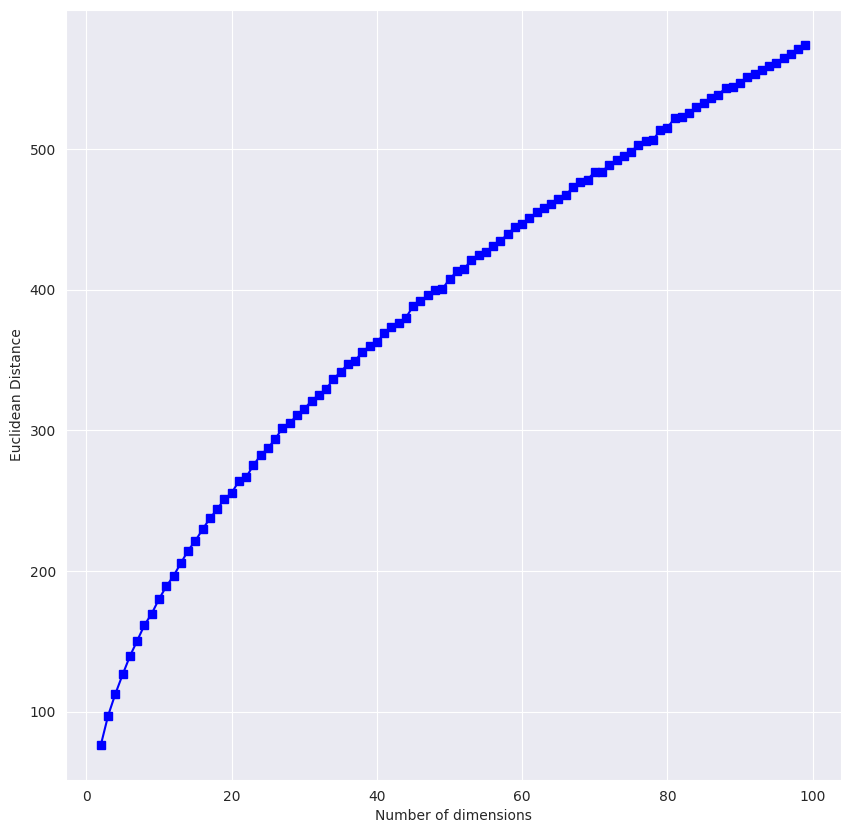

In [110]:
 def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) #Ensure p1/p2 are NumPy Arrays
    return np.sqrt(np.sum(np.square(p2-p1)))
%matplotlib inline
sns.set_style('darkgrid')
avg_distances = []

# a n-dimensional space
for n in range(2, 100):
    # origin
    origin = [0 for i in range(n)]
    # randomly sample 500 data points and calculate their distance to the origin
    samples = [ np.random.randint(low=-100, high=100, size=n) for _ in range(500)]
    avg_distances.append(np.mean([euclidean_distance(data, origin) for data in samples]))
plt.figure(figsize=(10,10))
plt.plot(range(2,100), avg_distances,'bs-')
# plt.plot( np.diff(avg_distances),'ro-')
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

In [94]:

X = pd.read_csv('data/remove-correlation.csv', delimiter=",", header=None).to_numpy()
# plt.plot(X[:,0], X[:,1], '.', markersize=14)
# plt.axis('equal')
# plt.title('Original Data')
# plt.show()
X.shape


(50, 2)

## Covariance Matrix
* $S=$

In [95]:
# variance using method
print(X[:, 0] .var())

# variance manually
print(np.mean(X[:, 0]*X[:, 0])- np.mean(X[:, 0])*np.mean(X[:, 0]))

1.348543475904
1.3485434759040054


In [96]:
# covariance
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X)
cov.covariance_

array([[1.34854348, 0.86535425],
       [0.86535425, 1.02642386]])

In [97]:
# covariance between two variables: E[x_0 * x_1] - E[x_0, x_1]
x_0 = X[:, 0] 
x_1 = X[:, 1]
s_01 = np.mean(x_0*x_1) - x_0.mean() * x_1.mean()
print(s_01)

0.865354251616008


In [98]:
# covariance matrix: E[X^T X] - E[X] (E[X])*T
covmat = np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True))
print(covmat)

[[1.34854348 0.86535425]
 [0.86535425 1.02642386]]


In [99]:
# Make all the steps easy: compute the covariance matrix for normalised X: E[X^T X]
# Now we only need E[X^T X]
mu = X.mean(axis=0) # shape: (2,)
sigma = X.std(axis=0)  # shape: (2,) 
Xnorm = (X - mu)/sigma # data shape: (50, 2)
covmat = np.dot(Xnorm.T, Xnorm)/len(Xnorm) 
print(covmat)


[[1.        0.7355261]
 [0.7355261 1.       ]]


## PCA
We can do Eigen-decomposition on $S$, where $S$ is a symmetric matrix
* $S=PDP^T$ 
* $ S p = \lambda p$
* all the eigenvalues of $S$ are nonnegative $$ $S$ is positive semi-difinite, 

In [100]:
# compute the eigenvectors (P) and eigenvalues (D) of the covariance matrix.
lambd, eigenvector= np.linalg.eig(covmat)

print('Eigen values: {}'.format(lambd))
print('Eigen vectors:')
print(eigenvector)

Eigen values: [1.7355261 0.2644739]
Eigen vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]



**How does it work?**

Let's understand eigenvalues and eigenvectors
* $ A v = \lambda v$,  where $v \in \mathbb{R}^{d}$
$$
\left[\begin{array}{cccc}
A_{11} & A_{12} & \cdots & A_{1 d} \\
A_{21} & A_{22} & \cdots & A_{2 d} \\
\vdots & \vdots & \ddots & \vdots \\
A_{d 1} & A_{d 2} & \cdots & A_{d d}
\end{array}\right]\left[\begin{array}{c}
v_1 \\
v_2 \\
\vdots \\
v_d
\end{array}\right]
$$


In [101]:
# let's understand  covmat . S P=P D
print(np.dot(covmat, eigenvector[:, 0])) # (d, d) * (d, 1)

print(eigenvector[:, 0]*lambd[0]) # (d, 1)

[1.22720227 1.22720227]
[1.22720227 1.22720227]


* $AV=VD$
* Importantly, if A is a symmetric matrix, $v_1, ..., v_d$ are orthogonal to each other. **V is an orthogonal matrix**
* D is a diagonal matrix
* $A=VDV^T$ 



In [102]:
# check whether eigenvector is orthogonal
np.dot(eigenvector[:, 0], eigenvector[:, 1])

0.0

## Remove correlation via PCA
* Project data into new coordinates
    * eigenvalues/eigenvectors are not actually ordered typically but in this case they are and the first eigenvalue accounts for the most variance. By that standard it is superior.
* Why does the transformation of eigenvector remove the correlation?
    + "ovariance among each pair of the principal axes is zero (the principal axes are uncorrelated i.e. they are orthogonal to each other)." (copy from 4.7)

In [108]:
# Z=X^T P
Z = np.dot(Xnorm, eigenvector) # (n, d) * (d, d0)
eigenvector.shape
# Z # (d, d)

# check covariance
X = Xnorm
print("The orginal covariance/unnormalized correlations:")
print(np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True)))

print("The covariance/unnormalized correlations after removing correlation:")
X = Z
covmat = np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True))

The orginal covariance/unnormalized correlations:
[[1.        0.7355261]
 [0.7355261 1.       ]]
The covariance/unnormalized correlations after removing correlation:


In [109]:
print(covmat)

[[1.73552610e+00 2.87461239e-16]
 [2.87461239e-16 2.64473903e-01]]


## Back to the idea of dimensionality reduction
* Could we use distance metrics we learnt from last week?
        $$
        \mathcal{L}=\sum_{i<j}\left(d_{i j}-\left\|\mathbf{y}_i-\mathbf{y}_j\right\|\right)^2
        $$
        + How many computations we need?
        + Projection-based method
* t-SNE: $p_{i j}=\frac{w_{i j}}{Z}$ is the normalized similarity between points i and j. 
    + Two closed neighbours in the high-dimensional space -> large $p_{i j}$. Clearly, it gives high price for putting closd neighbours far away. 
    + How about the price to put points far away closed? 
    + How to define $q_{i j}$? 
    + How close neighbours attract each other while all points repulse each other? How to optimize?
            $$\min \mathcal{L}=\sum_{i, j} p_{i j} \log \frac{p_{i j}}{q_{i j}} = \sum_{i j} p_{i j} \log p_{i j}-\sum_{i j} p_{i j} \log q_{i j}$$ 
            $$\min -\sum_{i, j} p_{i j} \log w_{i j}+\log \sum_{i, j} w_{i j}$$
            ![image.png](attachment:image.png)
    + Some materials for different tastes: [High-level visualization](https://www.enjoyalgorithms.com/blog/tsne-algorithm-in-ml); [another high-level visualization](https://www.youtube.com/watch?v=NEaUSP4YerM&t=215s); [Concrete explanation and background in math](https://www.youtube.com/watch?v=MnRskV3NY1k&t=1896s)
    + Why do we need t-SNE instead of PCA? See [the image](https://www.astroml.org/_images/fig_S_manifold_PCA_1.png) for an intuitive unserstanding.
    

## Pass Activity

(442, 10)


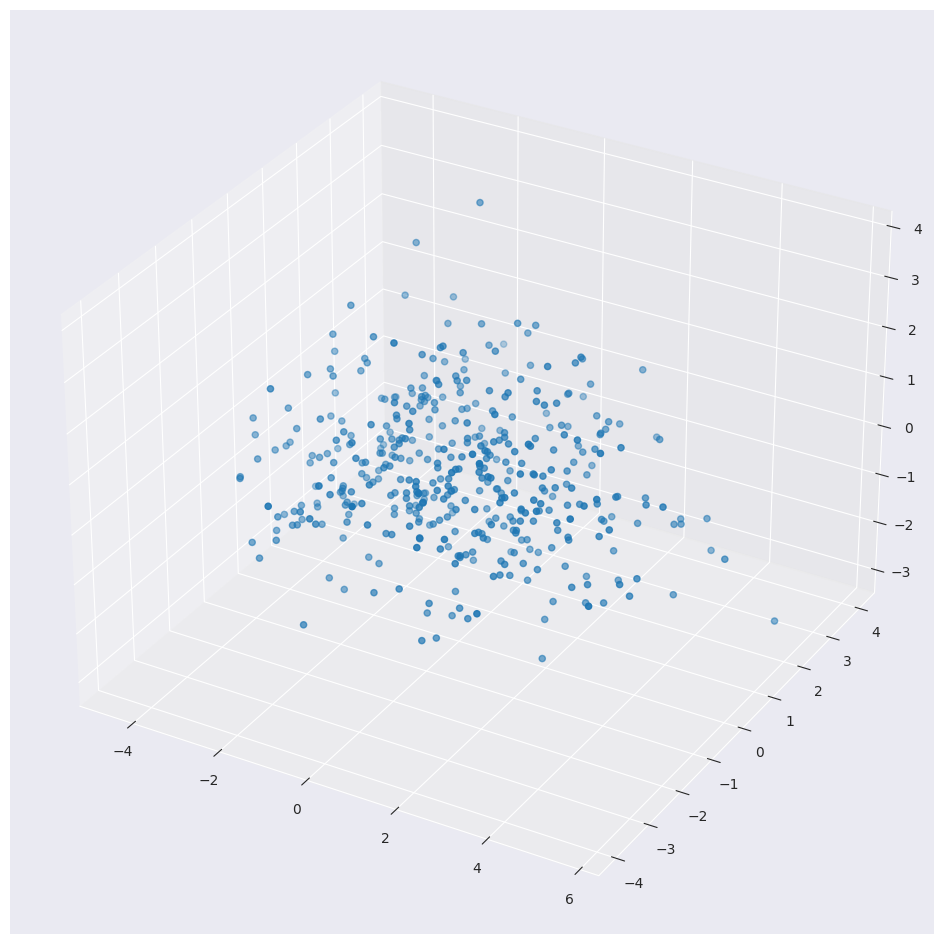

In [111]:
# 1. Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data. 
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = load_diabetes(as_frame=True)
df_data = df['data']
print(df_data.shape)

# normalize our data
data_norm=df_data.copy()
mu = data_norm.mean(axis=0) # mean of each col
sigma = data_norm.std(axis=0)  # std dev of each col
data_norm =(data_norm-mu)/sigma
# perform PCA using sklearn PCA implementation
pca = PCA(n_components=3, random_state=2)
Xnorm=data_norm.copy().values
pca.fit(Xnorm)
reduced_X = pca.transform(Xnorm)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2], color)
plt.show()

In [115]:
# 2. What is the variance (%) covered by first 3 components?  How is this percentage of variance computed? 
var= pca.explained_variance_ratio_
print(var)
print(var.sum())

# Measure the reconstruction error
# n_comp = range(1, 10)
# rec_error = np.zeros(len(n_comp))
# for k in n_comp:
#     pca = PCA(n_components=k)
#     Zred = pca.fit_transform(Xnorm)
#     Xrec = pca.inverse_transform(Zred)
#     rec_error[k-1] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
#     # print("k={}, rec_error={}".format(k, rec_error[k]))
# #Visualize the change in error
# plt.plot(n_comp,rec_error)
# plt.xlabel('No of principal components (k)')
# plt.ylabel('Reconstruction Error')

# 3. Is there any correlation between these three components? 
print(np.corrcoef(reduced_X, rowvar=False))
# Using equation
feat1 = 1
feat2= 2
cov =  np.dot(reduced_X[:, feat1], reduced_X[:, feat2])/len(reduced_X) -  reduced_X[:, feat1].mean() * reduced_X[:, feat2].mean()
cov/ (reduced_X[:, feat1].std() * reduced_X[:, feat2].std())
# the reason why correlations between (0, 1) (1, 2) are not the same may be due to the issue of numerical precision

[0.40242142 0.14923182 0.12059623]
0.6722494722420844
[[1.00000000e+00 1.11771034e-16 2.15757658e-16]
 [1.11771034e-16 1.00000000e+00 1.20103046e-17]
 [2.15757658e-16 1.20103046e-17 1.00000000e+00]]


5.4046370913282874e-17

In [ ]:
# 4. Apply t-SNE on the same dataset, select first 3 components and plot them.
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(Xnorm)
plt.scatter(projections[:,0],projections[:,1])

# 5. Report the comparison between the results obtained using t-SNE and PCA.